In [2]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility
from utility.math_utility import get_kl_rows
import pandas as pd
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
sns.set()

In [3]:
def create_mat_plot(mat, axis_names, title, filename, xlab, ylab, cmap='inferno', filetype='pdf', rx=0, ry=0, font_s=10,
                    annot=True):
    '''
    :param mat: divergence matrix
    :param axis_names: axis_names
    :param title
    :param filename: where to be saved
    :return:
    '''
    if len(axis_names) == 0:
        ax = sns.heatmap(mat, annot=annot, cmap=cmap, fmt="d")
    else:
        # removed fmt="d",
        ax = sns.heatmap(mat, annot=annot, yticklabels=axis_names, xticklabels=axis_names, cmap=cmap)
    plt.title(title)
    params = {
        'legend.fontsize': font_s,
        'xtick.labelsize': font_s,
        'ytick.labelsize': font_s,
        'text.usetex': True,
    }
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
    plt.rc('text', usetex=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(rotation=rx)
    plt.yticks(rotation=ry)
    plt.rcParams.update(params)
    plt.tight_layout()
    plt.savefig(filename + '.' + filetype, dpi=500)
    plt.show()
    plt.clf()



In [4]:
#df=pd.read_table('/mounts/data/proj/asgari/final_proj/Geno2Pheno/data_config/before_march_2018/Final_MICs_16.06.16.txt')
#df['sum']=df[['Tobramycin_S-vs-R','Ceftazidim_S-vs-R','Ciprofloxacin_S-vs-R','Meropenem_S-vs-R']].max(axis=1)
#df=df[['TOB MIC','CAZ MIC','CIP MIC','MEM MIC']]
#M=df.fillna(0.5).as_matrix()
#phenotypes=[x.replace(' MIC','') for x in ['TOB MIC','CAZ MIC','CIP MIC','MEM MIC']]
#M=np.array([[z.replace('≤','').replace('<=','').replace('≥','').replace('>=','') for z in x] for x in df.as_matrix()],dtype=np.float32)
df=pd.read_table('/mounts/data/proj/asgari/final_proj/Geno2Pheno/data_config/pheno_table_CLSI_S-vs-R.txt')

In [5]:
columns=['Tobramycin_S-vs-R','Ceftazidim_S-vs-R','Ciprofloxacin_S-vs-R','Meropenem_S-vs-R']
df=df[['Tobramycin_S-vs-R','Ceftazidim_S-vs-R','Ciprofloxacin_S-vs-R','Meropenem_S-vs-R']]
M=df.fillna(0.5).as_matrix()
phenotypes=[x.replace('_S-vs-R','') if not x.replace('_S-vs-R','')== 'Ceftazidim' else 'Ceftazidime' for x in ['Tobramycin_S-vs-R','Ceftazidim_S-vs-R','Ciprofloxacin_S-vs-R','Meropenem_S-vs-R']]


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
KL=get_kl_rows(M.T)
KL=KL/np.max(KL)

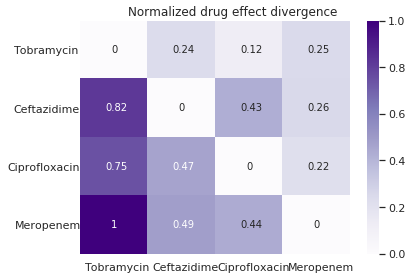

In [7]:
create_mat_plot(KL,phenotypes, 'Normalized drug effect divergence', 'drug_effec', '', '',cmap='Purples',filetype='png')

In [27]:
settings=['Tobramycin_S-vs-R','Ceftazidim_S-vs-R','Ciprofloxacin_S-vs-R','Meropenem_S-vs-R']


In [28]:
for setting in settings:
    df_temp=df[df[setting]>=0][['final all',setting]]
    dict_of_val=Series(df_temp[setting].values,index=df_temp['final all']).to_dict() 
    lines=['\t'.join([x,str(int(y))]) for x,y in dict_of_val.items()]
    FileUtility.save_list('/mounts/data/proj/asgari/final_proj/Geno2Pheno/data_config/pseudogenomics/'+setting+'.txt',lines)

In [29]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility

In [30]:
SWISS_seqs=FileUtility.read_fasta_sequences('/mounts/data/proj/asgari/final_proj/bioelmo/uniref-uniprot%3A%28reviewed%3Ayes%29+identity%3A0.5.fasta')

In [33]:


import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test = train_test_split(SWISS_seqs,test_size=0.1, random_state=42)

In [37]:
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/000_datasets/prot/uniref_swissprot/train.txt',[' '.join(list(x.lower())) for x in X_train])

In [38]:
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/000_datasets/prot/uniref_swissprot/test.txt',[' '.join(list(x.lower())) for x in X_test])